# Install Libraries

In [ ]:
pip install scikit-surprise

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_split
from surprise import accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack, csr_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate

# Load Data

In [ ]:
file_path = '/content/ADM_Proj.csv'
data = pd.read_csv(file_path)

# Sample Data

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                           order_id order_status  order_products_value  \
0  b95df3cef5297e79ef709ba256518f6f    delivered                349.90   
1  59af46052a799e80e2f0c665c587731d    delivered                 15.00   
2  a3e6136894621db402a772c6bc72a12a    delivered                238.90   
3  b675ea5a618922f6e679e30531b8957b    delivered                 29.99   
4  195a8be6794c487fe6cfbb97b7c61902    delivered                295.99   

   order_freight_value  order_items_qty  order_sellers_qty  \
0                13.84                1                  1   
1                15.10                1                  1   
2                18.00                1                  1   
3                18.23                1                  1   
4                47.65                1                  1   

  order_purchase_timestamp order_aproved_at order_estimated_delivery_date  \
0                  19:01.0          41:21.5                       00:00.0 

# Handling Missing Values

In [ ]:
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   order_status                   100000 non-null  object 
 2   order_products_value           100000 non-null  float64
 3   order_freight_value            100000 non-null  float64
 4   order_items_qty                100000 non-null  int64  
 5   order_sellers_qty              100000 non-null  int64  
 6   order_purchase_timestamp       100000 non-null  object 
 7   order_aproved_at               99982 non-null   object 
 8   order_estimated_delivery_date  100000 non-null  object 
 9   order_delivered_customer_date  97595 non-null   object 
 10  customer_id                    100000 non-null  object 
 11  customer_city                  100000 non-null  object 
 12 

In [ ]:
print("\nSummary of missing values:")
print(data.isnull().sum())


Summary of missing values:
order_id                             0
order_status                         0
order_products_value                 0
order_freight_value                  0
order_items_qty                      0
order_sellers_qty                    0
order_purchase_timestamp             0
order_aproved_at                    18
order_estimated_delivery_date        0
order_delivered_customer_date     2405
customer_id                          0
customer_city                        0
customer_state                       0
customer_zip_code_prefix             0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_id                           0
review_id                            0
review_score                         0
review_comment_title             91738
review_comment_message           57511
review_creation_date                 0
review_answer_timestamp             

In [ ]:
# Fill missing dates with placeholders or logical defaults
data['order_aproved_at'].fillna(data['order_purchase_timestamp'], inplace=True)
data['order_delivered_customer_date'].fillna('Not Delivered', inplace=True)

<ipython-input-50-cac46ef0f8a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['order_aproved_at'].fillna(data['order_purchase_timestamp'], inplace=True)
<ipython-input-50-cac46ef0f8a6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [ ]:
print("\nSummary of missing values:")
print(data.isnull().sum())


Summary of missing values:
order_id                             0
order_status                         0
order_products_value                 0
order_freight_value                  0
order_items_qty                      0
order_sellers_qty                    0
order_purchase_timestamp             0
order_aproved_at                     0
order_estimated_delivery_date        0
order_delivered_customer_date        0
customer_id                          0
customer_city                        0
customer_state                       0
customer_zip_code_prefix             0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_id                           0
review_id                            0
review_score                         0
review_comment_title             91738
review_comment_message           57511
review_creation_date                 0
review_answer_timestamp             

In [ ]:
# Fill missing review fields with placeholders
data['review_comment_title'].fillna('No Title', inplace=True)
data['review_comment_message'].fillna('No Comment', inplace=True)

<ipython-input-52-47f0f7fa7e55>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_comment_title'].fillna('No Title', inplace=True)
<ipython-input-52-47f0f7fa7e55>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
print("\nSummary of missing values:")
print(data.isnull().sum())


Summary of missing values:
order_id                         0
order_status                     0
order_products_value             0
order_freight_value              0
order_items_qty                  0
order_sellers_qty                0
order_purchase_timestamp         0
order_aproved_at                 0
order_estimated_delivery_date    0
order_delivered_customer_date    0
customer_id                      0
customer_city                    0
customer_state                   0
customer_zip_code_prefix         0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_id                       0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64


# Feature Engineering

In [ ]:
# Convert timestamps to datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], errors='coerce')
data['order_aproved_at'] = pd.to_datetime(data['order_aproved_at'], errors='coerce')
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'], errors='coerce')

<ipython-input-54-583486b811e6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], errors='coerce')
<ipython-input-54-583486b811e6>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['order_aproved_at'] = pd.to_datetime(data['order_aproved_at'], errors='coerce')
<ipython-input-54-583486b811e6>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'], errors='coerce')


In [ ]:
# Feature Engineering
data['total_order_value'] = data['order_products_value'] + data['order_freight_value']
data['approval_time'] = (data['order_aproved_at'] - data['order_purchase_timestamp']).dt.seconds / 3600
data['delivery_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

In [ ]:
# Fill missing values in new columns
data['approval_time'].fillna(data['approval_time'].median(), inplace=True)
data['delivery_time'].fillna(data['delivery_time'].median(), inplace=True)

<ipython-input-56-a8b017ce036f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['approval_time'].fillna(data['approval_time'].median(), inplace=True)
<ipython-input-56-a8b017ce036f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

# Normalizing Numerical Data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Normalize numeric features
scaler = StandardScaler()
data[['order_products_value', 'order_freight_value', 'total_order_value']] = scaler.fit_transform(
    data[['order_products_value', 'order_freight_value', 'total_order_value']]
)

# Normalizing Categorical Columns

In [ ]:
# Encode categorical columns
encoder = LabelEncoder()
data['product_category_encoded'] = encoder.fit_transform(data['product_category_name'])


# Correlation Matrix

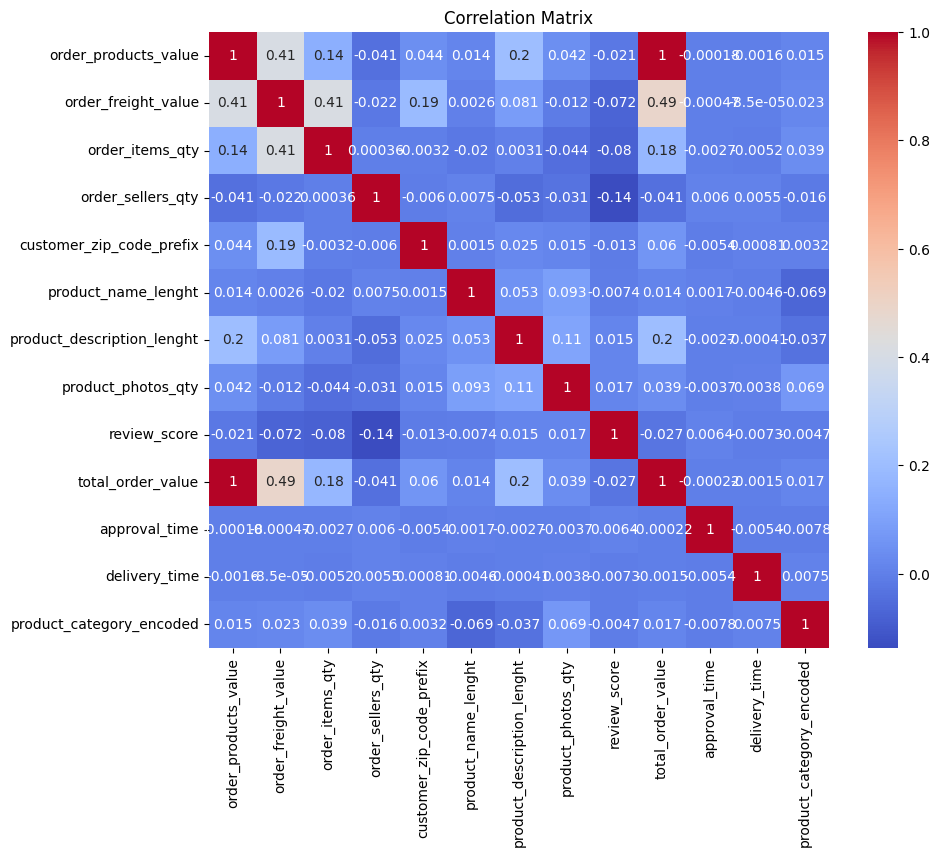

In [ ]:
# Select only numeric columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation = numerical_data.corr()

# Continue with your plotting code
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,total_order_value,approval_time,delivery_time,product_category_encoded
0,b95df3cef5297e79ef709ba256518f6f,delivered,1.132638,-0.393225,1,1,2024-12-03 19:01:00,NaT,00:00.0,2024-12-03 04:24:12,...,b95df3cef5297e79ef709ba256518f6f,5,No Title,No Comment,00:00.0,2017-02-09 02:37:37+00:00,1.043718,11.061667,-1.0,11
1,59af46052a799e80e2f0c665c587731d,delivered,-0.586013,-0.330501,1,1,NaT,2024-12-03 03:31:30,00:00.0,2024-12-03 17:41:18,...,59af46052a799e80e2f0c665c587731d,5,No Title,entrega em 2 dias produto c boa qualidade otim...,00:00.0,2017-09-15 03:43:47+00:00,-0.592613,11.061667,0.0,44
2,a3e6136894621db402a772c6bc72a12a,delivered,0.563005,-0.186139,1,1,2024-12-03 00:09:00,NaT,00:00.0,NaT,...,a3e6136894621db402a772c6bc72a12a,5,No Title,produto veio antes do prazo informado muito ob...,00:00.0,2017-02-10 14:18:53+00:00,0.519723,11.061667,0.0,8
3,b675ea5a618922f6e679e30531b8957b,delivered,-0.509087,-0.174689,1,1,2024-12-03 18:36:00,NaT,00:00.0,NaT,...,b675ea5a618922f6e679e30531b8957b,4,No Title,No Comment,00:00.0,2018-04-05 02:52:31+00:00,-0.503744,11.061667,0.0,13
4,195a8be6794c487fe6cfbb97b7c61902,delivered,0.855981,1.289847,1,1,2024-12-03 01:08:00,2024-12-03 05:40:24,00:00.0,NaT,...,195a8be6794c487fe6cfbb97b7c61902,5,No Title,No Comment,00:00.0,2017-05-08 15:20:18+00:00,0.945138,4.540000,0.0,54


# Data Preparation

In [ ]:
# Remove unnecessary columns
columns_to_drop = ['order_id', 'customer_city', 'customer_state']
data.drop(columns=columns_to_drop, inplace=True)

# Split the Data

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Collaborative Filtering

In [ ]:
# Prepare the dataset for Surprise
reader = Reader(rating_scale=(1, 5))
interaction_data = data[['customer_id', 'product_id', 'review_score']].dropna()
interaction_dataset = Dataset.load_from_df(interaction_data, reader)

# Split into train and test sets
trainset, testset = surprise_split(interaction_dataset, test_size=0.2)

# Train the SVD model
svd = SVD()
svd.fit(trainset)

# Evaluate the model
predictions = svd.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Collaborative Filtering RMSE: {rmse:.4f}")


RMSE: 1.3340
Collaborative Filtering RMSE: 1.3340


# Content Based Filtering

In [ ]:
# Content Based Filtering
# TF-IDF on product_category_name
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['product_category_name'])

# Calculate average review score and number of reviews for each product
# ----> This is the fix to create the necessary columns
product_review_data = data.groupby('product_id')['review_score'].agg(['mean', 'count'])
product_review_data.columns = ['avg_review_score', 'num_reviews']
data = data.merge(product_review_data, on='product_id', how='left')
# <---- End of fix

# Combine features
numeric_features = data[['avg_review_score', 'num_reviews']].fillna(0)
numeric_features_scaled = scaler.fit_transform(numeric_features)
combined_features = hstack([tfidf_matrix, csr_matrix(numeric_features_scaled)])

# Compute cosine similarity dynamically
def recommend_products_content(product_id, feature_matrix, product_ids, n=5):
    product_idx = product_ids.index(product_id)
    product_vector = feature_matrix[product_idx]
    similarity_scores = cosine_similarity(product_vector, feature_matrix).flatten()
    similar_indices = similarity_scores.argsort()[::-1][1:n+1]
    similar_product_ids = [product_ids[i] for i in similar_indices]
    return similar_product_ids

product_ids = data['product_id'].tolist()

# Hybrid Model

In [ ]:
data.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,...,review_comment_message,review_creation_date,review_answer_timestamp,total_order_value,approval_time,delivery_time,product_category_encoded,avg_review_score,num_reviews,customer_id_encoded
0,delivered,1.132638,-0.393225,1,1,2024-12-03 19:01:00,NaT,00:00.0,2024-12-03 04:24:12,297dcf281305aabfee256d313076af2b,...,No Comment,00:00.0,2017-02-09 02:37:37+00:00,1.043718,11.061667,-1.0,11,4.380165,242,80634
1,delivered,-0.586013,-0.330501,1,1,NaT,2024-12-03 03:31:30,00:00.0,2024-12-03 17:41:18,b7563d94162ed0aa3f8d9cada4bcc536,...,entrega em 2 dias produto c boa qualidade otim...,00:00.0,2017-09-15 03:43:47+00:00,-0.592613,11.061667,0.0,44,4.363636,11,27246
2,delivered,0.563005,-0.186139,1,1,2024-12-03 00:09:00,NaT,00:00.0,NaT,f102cb15ec41ca30fa2902da06495f6b,...,produto veio antes do prazo informado muito ob...,00:00.0,2017-02-10 14:18:53+00:00,0.519723,11.061667,0.0,8,3.882353,17,5556
3,delivered,-0.509087,-0.174689,1,1,2024-12-03 18:36:00,NaT,00:00.0,NaT,e33c250311160298e5b457ca52720a35,...,No Comment,00:00.0,2018-04-05 02:52:31+00:00,-0.503744,11.061667,0.0,13,4.214286,14,10777
4,delivered,0.855981,1.289847,1,1,2024-12-03 01:08:00,2024-12-03 05:40:24,00:00.0,NaT,8a8f7c9a4450f17ba3ee25a5ba821bc7,...,No Comment,00:00.0,2017-05-08 15:20:18+00:00,0.945138,4.540000,0.0,54,5.000000,1,44067


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from surprise import Reader, Dataset, SVD
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# 1. Prepare Data for Collaborative Filtering
reader = Reader(rating_scale=(1, 5))
interaction_data = data[['customer_id', 'product_id', 'review_score']].dropna()
interaction_dataset = Dataset.load_from_df(interaction_data, reader)
trainset = interaction_dataset.build_full_trainset()

# 2. Train SVD Model
svd = SVD()
svd.fit(trainset)

# 3. Extract Latent Factors
customer_latent = {uid: svd.pu[idx] for idx, uid in enumerate(trainset.all_users())}
product_latent = {iid: svd.qi[idx] for idx, iid in enumerate(trainset.all_items())}

# 4. Add Latent Factors to DataFrame
data['customer_latent'] = data['customer_id'].map(customer_latent).apply(lambda x: list(x) if isinstance(x, np.ndarray) else [0]*10)
data['product_latent'] = data['product_id'].map(product_latent).apply(lambda x: list(x) if isinstance(x, np.ndarray) else [0]*10)

# 5. Prepare Features for Random Forest
content_features = ['avg_review_score', 'num_reviews', 'order_products_value', 'order_freight_value']
latent_features = [f'customer_latent_{i}' for i in range(10)] + [f'product_latent_{i}' for i in range(10)]
# Creating latent feature names

# Expand latent features into separate columns
latent_df = pd.DataFrame(data['customer_latent'].tolist(), columns=[f'customer_latent_{i}' for i in range(10)])
latent_df = pd.concat([latent_df, pd.DataFrame(data['product_latent'].tolist(), columns=[f'product_latent_{i}' for i in range(10)])], axis=1)
data = pd.concat([data, latent_df], axis=1)  # Concatenating latent features to data

# 6. Train Random Forest
all_features = content_features + latent_features  # Combining all features
X = data[all_features]
y = data['review_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Evaluate Model
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse:.4f}")

# ... (Previous code for model training and evaluation) ...

# 8. Prediction for a Specific Customer (Enhanced)
def recommend_products_for_customer(customer_id, top_n=5):
    """Recommends products for a given customer.

    Args:
        customer_id (str): The ID of the customer.
        top_n (int, optional): The number of products to recommend. Defaults to 5.

    Returns:
        list: A list of recommended product IDs.
    """
    specific_customer_data = data[data['customer_id'] == customer_id]

    if not specific_customer_data.empty:  # Existing customer
        pred_ratings = rf.predict(specific_customer_data[all_features])
        top_indices = np.argsort(pred_ratings)[-top_n:][::-1]
        recommended_products = specific_customer_data['product_id'].iloc[top_indices].tolist()
    else:  # New customer (cold start)
        # Recommend popular products or products from similar categories
        # (You'll need to implement this logic based on your data)
        # For example, you could recommend the top-rated products overall:
        popular_products = data.groupby('product_id')['review_score'].mean().sort_values(ascending=False).index
        recommended_products = popular_products[:top_n].tolist()

    print(f"Top {top_n} recommended products for customer {customer_id}:")
    for product_id in recommended_products:
        product_name = data[data['product_id'] == product_id]['product_category_name'].iloc[0]
        print(product_id, "-", product_name)

    return recommended_products

# Create a text box widget
customer_id_input = widgets.Text(
    value='',
    description='Enter Customer ID:',
    placeholder='e.g., e33c250311160298e5b457ca52720a35',
)

# Create an output widget to display recommendations
recommendations_output = widgets.Output()

# Define a function to handle button click
def on_button_clicked(b):
    with recommendations_output:
        recommendations_output.clear_output()  # Clear previous output
        customer_id = customer_id_input.value
        recommend_products_for_customer(customer_id)

# Create a button widget
recommend_button = widgets.Button(description='Get Recommendations')
recommend_button.on_click(on_button_clicked)

# Display the widgets
display(customer_id_input, recommend_button, recommendations_output)


Random Forest RMSE: 1.2484


Text(value='', description='Enter Customer ID:', placeholder='e.g., e33c250311160298e5b457ca52720a35')

Button(description='Get Recommendations', style=ButtonStyle())

Output()

In [ ]:
# Evaluate the model
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Hybrid Model RMSE: {rmse:.4f}")

Hybrid Model RMSE: 1.2484


# Save the Models

In [ ]:
import joblib  # Import joblib for saving and loading models

# Saving Content-Based Filtering components
joblib.dump(tfidf, 'content_based_tfidf.pkl')
joblib.dump(scaler, 'content_based_scaler.pkl')

# Saving Collaborative Filtering (SVD) model
joblib.dump(svd, 'collaborative_filtering_model.pkl')

# Saving Hybrid Model (RandomForestRegressor)
joblib.dump(rf, 'hybrid_model.pkl')

['hybrid_model.pkl']

# Load the Saved Models

In [ ]:
import joblib

# Content-Based Filtering components
loaded_tfidf = joblib.load('content_based_tfidf.pkl')
loaded_scaler = joblib.load('content_based_scaler.pkl')

# Collaborative Filtering (SVD) model
loaded_svd = joblib.load('collaborative_filtering_model.pkl')

# Hybrid Model (RandomForestRegressor)
loaded_rf = joblib.load('hybrid_model.pkl')

# Using the Loaded Models

In [ ]:
predictions = loaded_svd.test(testset)  # Use loaded_svd for prediction

# Example usage for Hybrid Model
# ... (Prepare your data with content and latent features) ...
y_pred = loaded_rf.predict(X_test)  # Use loaded_rf for prediction